In [58]:
import sys
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline

In [59]:
def featureNormalize(data):
    mu=np.mean(data,axis=0)
    data_norm=data-mu
    sigma= np.std(data_norm,axis=0,ddof=1)
    data_norm=data_norm/sigma
    return data_norm, mu, sigma
    
     
    

In [60]:
def gradientDescent(X,y,theta,alpha,iters,m):
    grad=np.copy(theta)
    max_j=X.shape[1]
    J_history=[]
    alpha_div_m=alpha/m
    
    for counter in range(0,iters):
        
        inner_sum=np.dot(X.T,(np.dot(X,grad)-y))
        
        grad= grad-alpha_div_m*inner_sum
        
        J_history.append(computeCost(X,y,grad,m))
        
    return J_history,grad
    

In [61]:
def computeCost( X, y, theta, m ):
    term = np.dot(X,theta ) - y
    return ( np.dot(term.T, term ) / (2 * m) )[0, 0]


In [80]:
def normalEquation( X, y ):
	return np.linalg.inv(np.dot(X.T,X )).dot( X.T ).dot( y )

In [63]:
def part3_1():
	data = np.genfromtxt( "ex1data2.txt", delimiter = ',' )
	X = data[:, 0:2]
	y = data[:, 2:3]

	X, mu, sigma = featureNormalize( X )
	print(X)
	print(mu)
	print(sigma)

In [68]:
def part3_2():
    #get data
	data = np.genfromtxt( "ex1data2.txt", delimiter = ',' )
	X = data[:, 0:2]
	y = data[:, 2:3]
	m = X.shape[0] #number of fetatures

#normalize data
	X, mu, sigma = featureNormalize(X)

	X = np.c_[np.ones((m, 1)), X] # add intercept to X
	iterations = 400
	alphas = [0.01, 0.03, 0.1, 0.3, 1.0]

	# for each alpha, try to do gradient descent and plot the convergence curve
	for alpha in alphas:
		theta = np.zeros((3, 1))
		J_history, theta = gradientDescent( X, y, theta, alpha, iterations, m )

		# create an array of number of iterations
		number_of_iterations = np.array( [x for x in range( 1, iterations + 1 )] ).reshape( iterations, 1)

		plt.plot( number_of_iterations, J_history, '-b' )
		plt.title( "Alpha = %f" % (alpha) )
		plt.xlabel('Number of iterations')
		plt.ylabel('Cost J')
		plt.xlim([0, 50])

		# 1650 sq feet 3 bedroom house
		test = np.array([1.0, 1650.0, 3.0])
		# exclude intercept units
		test[1:] = (test[1:] - mu) / sigma
		print(np.dot(test,theta))

In [77]:
def part3_3():
	data = np.genfromtxt("ex1data2.txt", delimiter = ',' )
	X = data[:, 0:2]
	y = data[:, 2:3]
	m = X.shape[0]

	X = np.c_[ np.ones((m, 1)), X ] # add intercept to X

	theta = normalEquation( X, y )
	# 1650 sq feet 3 bedroom house
	test = np.array([1.0, 1650.0, 3.0])
	print (np.dot(test, theta ))

In [70]:
data = np.genfromtxt( "ex1data2.txt", delimiter = ',' )
X = data[:, 0:2]
y = data[:, 2:3]
m = X.shape[0]

In [66]:
X.shape[1]

2

[[ 1.30009869e-01 -2.23675187e-01]
 [-5.04189838e-01 -2.23675187e-01]
 [ 5.02476364e-01 -2.23675187e-01]
 [-7.35723065e-01 -1.53776691e+00]
 [ 1.25747602e+00  1.09041654e+00]
 [-1.97317285e-02  1.09041654e+00]
 [-5.87239800e-01 -2.23675187e-01]
 [-7.21881404e-01 -2.23675187e-01]
 [-7.81023044e-01 -2.23675187e-01]
 [-6.37573110e-01 -2.23675187e-01]
 [-7.63567023e-02  1.09041654e+00]
 [-8.56737193e-04 -2.23675187e-01]
 [-1.39273340e-01 -2.23675187e-01]
 [ 3.11729182e+00  2.40450826e+00]
 [-9.21956312e-01 -2.23675187e-01]
 [ 3.76643089e-01  1.09041654e+00]
 [-8.56523009e-01 -1.53776691e+00]
 [-9.62222960e-01 -2.23675187e-01]
 [ 7.65467909e-01  1.09041654e+00]
 [ 1.29648433e+00  1.09041654e+00]
 [-2.94048269e-01 -2.23675187e-01]
 [-1.41790005e-01 -1.53776691e+00]
 [-4.99156507e-01 -2.23675187e-01]
 [-4.86733818e-02  1.09041654e+00]
 [ 2.37739217e+00 -2.23675187e-01]
 [-1.13335621e+00 -2.23675187e-01]
 [-6.82873089e-01 -2.23675187e-01]
 [ 6.61026291e-01 -2.23675187e-01]
 [ 2.50809813e-01 -2

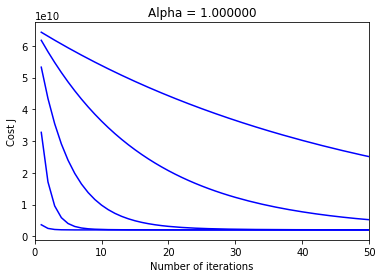

In [81]:
def main():
	#set_printoptions(precision=6, linewidth=200)

	part3_1()
	part3_2()
	part3_3()



main()